In [20]:
import  lib_Experimentum    as      Exp
from    Alessandria         import  *
from    Models              import  S_2_Generate, S_Dynamical_Form_Factor_2

import pandas as pd
import  numpy               as      np
import  h5py 
from    scipy.io            import  loadmat

from    matplotlib.pyplot   import  plot
import  matplotlib.pyplot   as      plt


import  time


In [2]:
y   =   Import_TIF(filename = 'img_000000000_Default_000.tif', path = '../2611_trento_K27M/water_up/Pos0/' )
y   =   np.mean(y, 1)

Cojone  modifica le cose in modo che la funzione apra da sola il file.mat


ATTENZIONE funzione da aggiornare



ATTENZIONE guarda Get_VIPA_mat


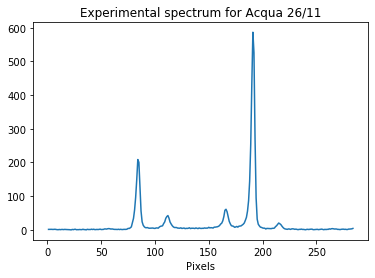

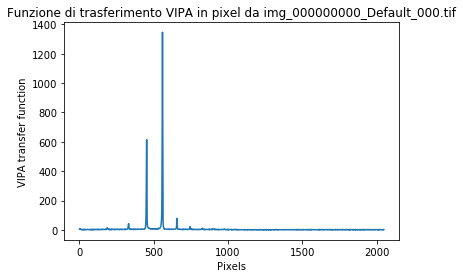

In [3]:
Water   =   Exp.Spectrum('Acqua 26/11')
Water.Get_Spectrum(y, offset = 183., fig = 'Spectrum_Pix', save_path = '../figure/')
Water.Get_VIPA_tif(tif_filename = 'img_000000000_Default_000.tif', path ='../2611_trento_K27M/elastici_verdi/Pos0/', fig = 'VIPA_Pix', save_path = '../figure/')




 Ho trovato 4 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 20.00 
 Spessore > 0.00 



 Il picco 1 ha: 	 indice = 83 	 x_value (Pix) = 84.00 	 ampiezza(Pix) = 4.15 


 Il picco 2 ha: 	 indice = 111 	 x_value (Pix) = 112.00 	 ampiezza(Pix) = 5.00 


 Il picco 3 ha: 	 indice = 165 	 x_value (Pix) = 166.00 	 ampiezza(Pix) = 4.77 


 Il picco 4 ha: 	 indice = 190 	 x_value (Pix) = 191.00 	 ampiezza(Pix) = 3.69 



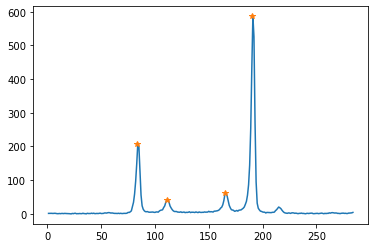

In [4]:
kwargs = {'height' : 20, 'width' : 0.001}

_,_ = Analyze_Peaks(Water.x_pix, Water.y, 'Pix', fig = True, verbose=True, **kwargs)



 Ho trovato 3 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 50.00 
 Spessore > 0.00 



 Il picco 1 ha: 	 indice = 452 	 x_value (Pix) = 453.00 	 ampiezza(Pix) = 4.15 


 Il picco 2 ha: 	 indice = 558 	 x_value (Pix) = 559.00 	 ampiezza(Pix) = 3.57 


 Il picco 3 ha: 	 indice = 655 	 x_value (Pix) = 656.00 	 ampiezza(Pix) = 3.64 



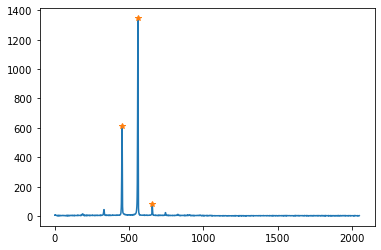

In [5]:
_,_ = Analyze_Peaks(Water.x_VIPA, Water.y_VIPA, 'Pix', verbose=True, fig = True, height = 50, width = 0.00001)

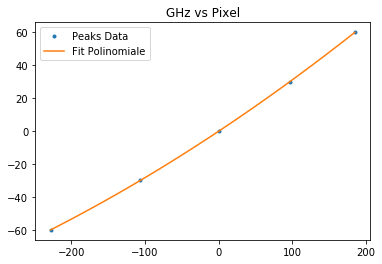

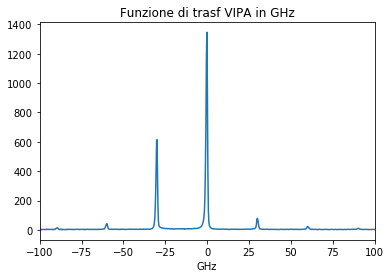

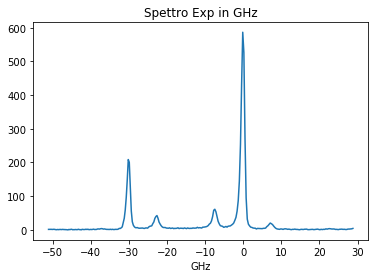

In [6]:
Water.Fit_Pixel2GHz(fig = True, height = 20)
Water.VIPA_Pix2GHz(fig=True)
Water.Spectrum_Pix2GHz(fig=True)



 Ho trovato 4 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 20.00 
 Spessore > 0.00 



 Il picco 1 ha: 	 indice = 83 	 x_value (GHz) = -30.16 	 ampiezza(GHz) = 4.15 


 Il picco 2 ha: 	 indice = 111 	 x_value (GHz) = -22.64 	 ampiezza(GHz) = 5.00 


 Il picco 3 ha: 	 indice = 165 	 x_value (GHz) = -7.46 	 ampiezza(GHz) = 4.77 


 Il picco 4 ha: 	 indice = 190 	 x_value (GHz) = -0.13 	 ampiezza(GHz) = 3.69 



Ho stimato 9 parametri iniziali per il fit che andrai a fare

Omega  = 7.590 

Gamma  = 0.488 

Delta  = 0.488 

offset  = 9.813 

Co  = 1000.000 

shift  = 0.000 

tau  = 1.000 

delta_amplitude  = 586.538 

delta_width  = 0.500 



Text(0.5, 1.0, 'Water Exp Counts vs GHz')

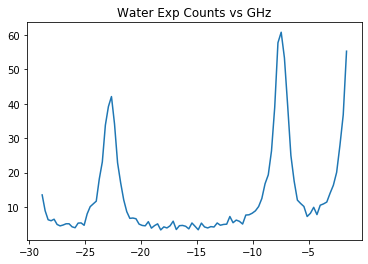

In [7]:
syg_kwargs = {'height' : 20, 'width' : 0.001}
Water.Cut_n_Estimate_Spectrum(cut = True, distanza = 0.3, verbose = True,  **syg_kwargs)

plt.figure()
plot(Water.x_freq, Water.y)
plt.title('Water Exp Counts vs GHz')

Secondi impiegati per conv veloce =  0.03125


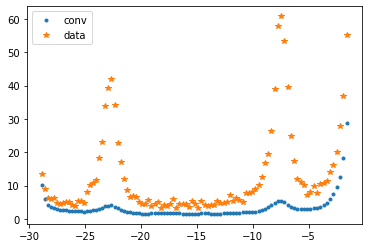

In [10]:
p0  =   pd.DataFrame(Water.p0, columns = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_width','delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset'))
p0['Co'] = [0.01]
p0['Omega']= [7.2]
p0['Gamma']= [0.3]
p0['delta_amplitude'] = p0['delta_amplitude'] /2800
p0['offset'] = [0]
start = time.process_time()
_ = Water.Gauss_Convolve_Theoretical_Response_Fast(p0.values[0])
print("Secondi impiegati per conv veloce = ", time.process_time()-start)
plot(Water.x_freq, Water.y_Gauss_convolution, '.', label = 'conv')
plot(Water.x_freq,Water.y, '*', label = 'data')
plt.legend()



 Ho trovato 3 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 50.00 
 Spessore > 0.00 


Ho stimato i parametri della gaussiana come A = 1545.71	mu  = -8.44	sigma = 15.80
E li ho aggiunti ai parametri iniziali per il fit. Ora conosco 12 parametri su 12 



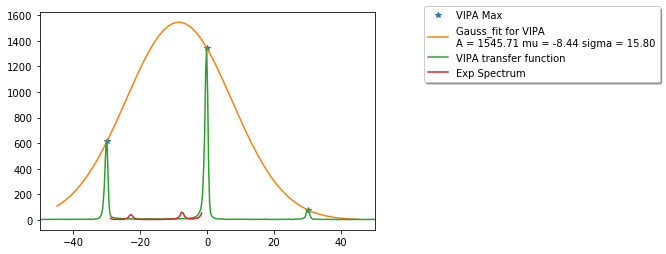

In [9]:
Water.Fit_VIPA_Gaussian(fig = True, height = 50, width = 0.0001)


Assumo vettore dei parametri iniziali da quello inserito come arg
 [1.34408419e-01 7.13419978e+00 5.21450201e-02 4.51709034e+02
 1.10099960e+03 6.14447649e-01 2.88683290e-01 3.28852487e+03
 1.84811417e+02 2.59861449e+02 4.65461244e-02 1.18984392e+00] 

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.7700e+02                                    5.29e+03    
       1              9         2.3644e+02      1.41e+02       2.14e-01       6.00e+03    
       2             10         1.9293e+02      4.35e+01       2.14e-01       1.88e+03    
       3             11         1.7285e+02      2.01e+01       2.14e-01       5.80e+02    
       4             12         1.7246e+02      3.94e-01       4.29e-01       1.53e+03    
       5             13         1.6324e+02      9.22e+00       1.07e-01       9.01e+01    
       6             14         1.5662e+02      6.62e+00       2.14e-01       2.66e+02    
       7          

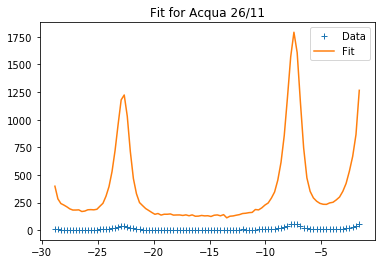

In [18]:
p1 = np.array([ 1.34408419e-01,  7.13419978e+00,  5.21450201e-02,  4.51709034e+02,
        1.10099960e+03,  6.14447649e-01,  2.88683290e-01,  3.28852487e+03,
       1.84811417e+02, 2.59861449e+02,  4.65461244e-02,  1.18984392e+00])
bounds_down     =    [0,0,0,0,0,0,0,0, -np.inf, 0, -np.inf, -np.inf]
bounds_up       =    [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 0.3, np.inf, np.inf, np.inf, np.inf, np.inf]
Water.Non_Linear_Least_Squares(p0 = p0.values[0], my_method = 'least_squares', verbose = 2, fig = True)#, bound = (bounds_down, bounds_up))

In [41]:
Water.res_lsq

 active_mask: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        cost: 59.34163937376289
         fun: array([-1.04479332,  0.40496995,  1.70097414,  1.61270227,  0.55391696,
        1.40239069,  1.48741353,  1.26118104,  0.90651121,  0.35039291,
        1.48499578,  2.15748526,  0.7723431 ,  0.59988575,  1.46756117,
       -0.8789874 , -2.11730344, -0.65676973,  1.50227514, -0.33300074,
        1.15676245, -1.44927018,  0.81460344, -0.60168556,  0.68137473,
        1.01421371, -1.42524713, -1.11216058, -0.4057597 ,  0.68441964,
       -0.40060821, -0.79621375,  0.09399986, -0.06347531,  0.36609448,
       -1.39747284,  0.87644362,  0.11585184, -0.29348644,  1.05786729,
        0.28159554,  0.57541343, -0.21726583, -1.34850901,  0.76744477,
       -0.00976372, -0.60825444, -0.25028006,  0.69894152, -1.17229035,
       -0.1144391 ,  0.64361713, -0.82531169,  0.32975551,  0.33543257,
        0.33236879, -0.74687201, -1.18604923, -0.48119964, -0.45600248,
       -0.34735473, -2.18074087,

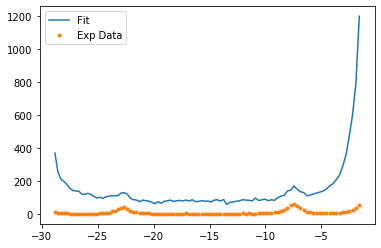

In [43]:
prova = Water.res_lsq.x
prova[0] = prova[0]/28
plot(Water.x_freq, Water.Gauss_Convolve_Theoretical_Response(prova), label = 'Fit')
plot(Water.x_freq, Water.y, '.', label = 'Exp Data')
plt.legend()

In [0]:
prova = np.histogram_bin_edges(Water.x_freq, bins = Water.x_freq)
prova1  = prova
prova = prova[1:]
prova1 = prova1[:prova1.size-1]
delta = prova - prova1
delta

In [49]:
Water.Fit_Params.T

,Values,StdErrs,Initials
Co,0.169894,9.616045e-02,0.200000
Omega,6.568495,5.273071e-01,7.200000
Gamma,0.114373,2.888690e-02,0.300000
Delta,2.705530,3.358477e+00,0.488387
tau,1.032158,7.178483e-01,1.000000
delta_width,0.535635,3.481676e-02,0.500000
delta_amplitude,0.300000,4.611252e-02,0.122196
A,6.894766,3.974200e+06,1545.713516
mu,392.496310,4.959097e+04,-8.439544
sigma,128.622768,7.821666e+03,15.797393


In [0]:
from Alessandria import Get_Delta_Between_Array_Elements
Get_Delta_Between_Array_Elements(Water.x_freq)

In [0]:
_, idx_min = Find_Nearest(Water.x_VIPA_freq, -35.)
_, idx_max = Find_Nearest(Water.x_VIPA_freq, 35.)

plot(Water.x_VIPA_freq[idx_min:idx_max], Water.y_VIPA[idx_min:idx_max])

In [0]:
VIPA_w_j                =       Water.y_VIPA[idx_min:idx_max]
Delta_w_j_VIPA          =       Get_Delta_Between_Array_Elements(VIPA_w_j)
Delta_w_j_VIPA